In [76]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

if '..' not in sys.path:
    sys.path.append('..')

In [20]:
%load_ext autoreload
%autoreload 2

# Run Experiments

Experimental questions:
1. Does the risk-based stopping criteria prevents overfitting.
2. Which Bayesian model performs best?

In [165]:
from src.ExperimentManager import ExperimentManager

In [205]:
# init
man = ExperimentManager()

# get risk-alphas
risk_probas = np.linspace(0.01, 1, 20)
# assert len(risk_probas) == 10

# try different risk probabilities
for risk_proba in risk_probas:
    man.run_experiment(
        dataset=1,
        n_samples=100,
        risk_proba=risk_proba
    )

# show results
results = man.get_results()
results

,model,dataset,n_samples,risk_proba,pred_avg_rev,true_avg_rev
0,binom_glm,1,100,0.010000,6.473083,4.345612
1,opt_price,1,100,0.010000,6.761233,NaN
2,binom_glm,1,100,0.062105,6.664052,4.538349
3,opt_price,1,100,0.062105,6.761233,NaN
4,binom_glm,1,100,0.114211,6.664052,4.538349
5,opt_price,1,100,0.114211,6.761233,NaN
6,binom_glm,1,100,0.166316,6.664052,4.538349
7,opt_price,1,100,0.166316,6.761233,NaN
8,binom_glm,1,100,0.218421,6.664052,4.538349
9,opt_price,1,100,0.218421,6.761233,NaN


## Visualize Results
### Risk

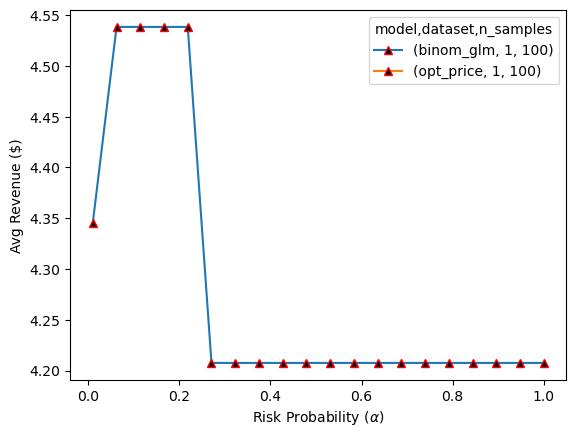

In [207]:
data = pd.pivot_table(
    results,
    index=['model', 'dataset', 'n_samples'],
    columns='risk_proba',
    values=['pred_avg_rev', 'true_avg_rev']
)

fig, ax = plt.subplots()

# data['pred_avg_rev'].T.plot(ax=ax)
data['true_avg_rev'].T.plot(
    marker='^', 
    markerfacecolor='black',
    markeredgecolor='red',
    # markersize=7,
    ax=ax
)

plt.ylabel('Avg Revenue ($)')
plt.xlabel('Risk Probability ($\\alpha$)')

plt.show()

### Error

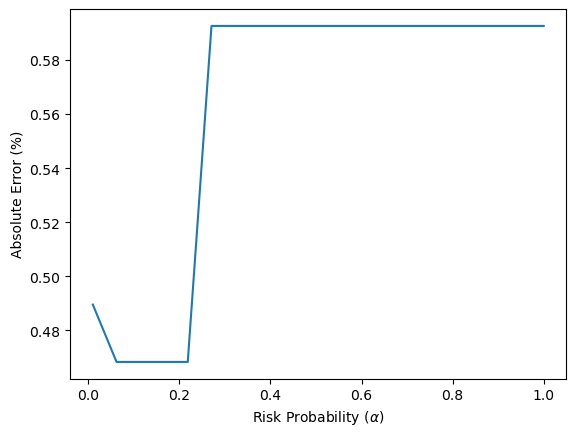

In [212]:
a = data['true_avg_rev'].T['binom_glm']
b = data['pred_avg_rev'].T['binom_glm']

plt.plot(np.abs(a - b) / a)

plt.ylabel('Absolute Error (%)')
plt.xlabel('Risk Probability ($\\alpha$)')

plt.show()

### Optimal, vs True, Predicted

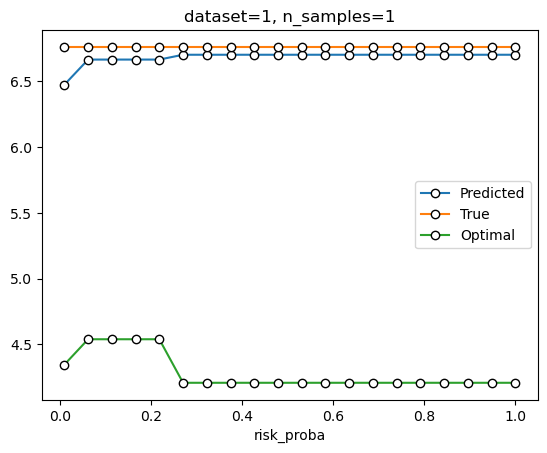

In [223]:
fig, ax = plt.subplots()
# # data.plot(
 
# # )

# # plt.ylabel('Avg Revenue ($)')
# # plt.xlabel('Risk Probability ($\\alpha$)')
# # plt.show()

data['pred_avg_rev'].T.plot(
    marker='o', 
    markerfacecolor='white',
    markeredgecolor='black',
    ax=ax
)
data['true_avg_rev'].T.dropna(axis=1).plot(
    marker='o', 
    markerfacecolor='white',
    markeredgecolor='black',
    ax=ax
)

plt.title('dataset=1, n_samples=1')
plt.legend(['Predicted', 'True', 'Optimal'])

plt.show()